In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import pickle


Import Data

In [9]:
import pandas as pd

df = pd.read_csv('diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Informasi Dataset

In [11]:
df.info()
df.describe()
df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Visualisasi

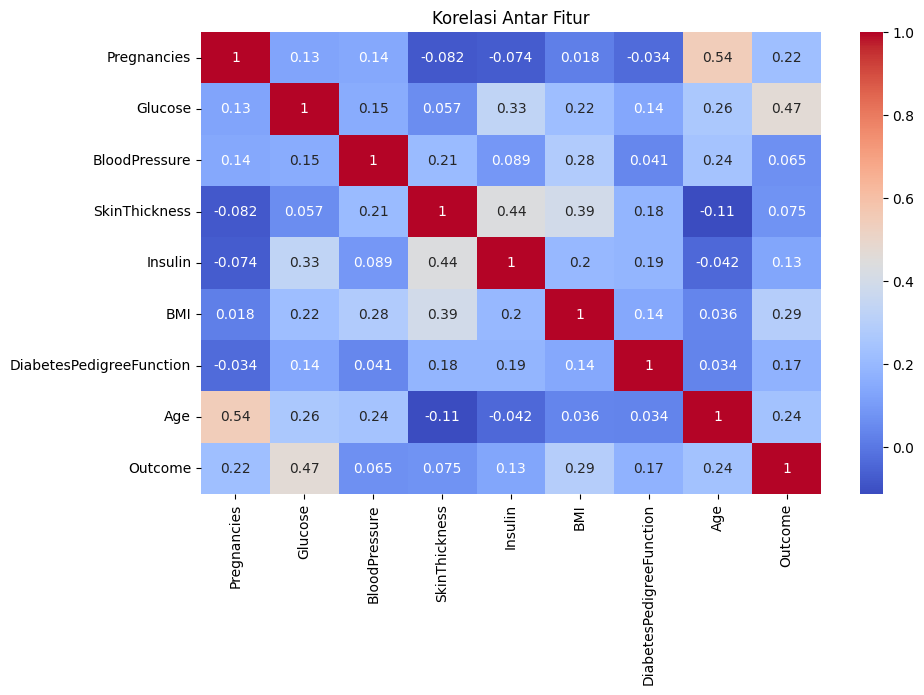

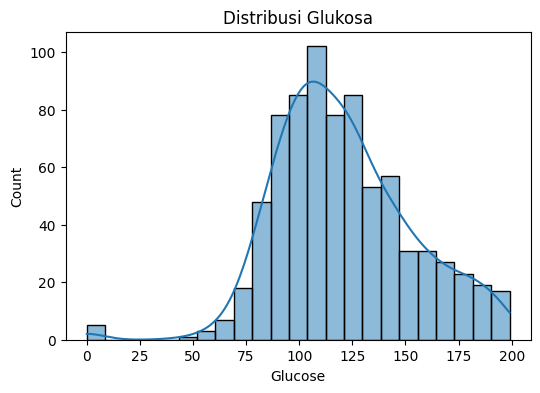

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasi fitur
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur')
plt.show()

# Histogram Glukosa
plt.figure(figsize=(6,4))
sns.histplot(df['Glucose'], kde=True)
plt.title('Distribusi Glukosa')
plt.show()


# 2 Data Preprocessing


memisahkan fitur dan target

In [13]:
# 1. Pisahkan fitur dan target
X_df = df.drop(['Outcome'], axis=1)
y = df['Outcome']

# 2. Simpan index sebelum scaling
idx = X_df.index

# 3. Standarisasi
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X_df)

# 4. Split Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 5. Split Index juga
idx_train, idx_test = train_test_split(idx, test_size=0.2, random_state=42)

# 6. Tampilkan index
print("Index data latih:", idx_train.tolist())
print("Index data uji:", idx_test.tolist())


Index data latih: [60, 618, 346, 294, 231, 340, 535, 306, 718, 90, 377, 235, 158, 69, 260, 131, 44, 70, 264, 673, 286, 640, 135, 745, 165, 164, 28, 608, 583, 746, 292, 136, 432, 554, 319, 594, 6, 615, 357, 73, 352, 497, 145, 514, 291, 132, 559, 631, 719, 395, 41, 637, 108, 481, 56, 323, 685, 758, 572, 529, 24, 465, 247, 443, 351, 327, 110, 82, 51, 449, 762, 703, 619, 198, 538, 329, 302, 334, 139, 485, 547, 18, 593, 140, 326, 266, 626, 83, 61, 632, 735, 29, 335, 599, 557, 311, 429, 182, 586, 679, 464, 223, 393, 766, 570, 671, 412, 755, 176, 525, 333, 163, 248, 682, 74, 439, 643, 104, 114, 749, 92, 380, 89, 417, 477, 713, 707, 506, 11, 43, 42, 167, 675, 666, 381, 178, 705, 518, 177, 532, 539, 257, 616, 440, 15, 478, 256, 388, 360, 367, 446, 589, 342, 453, 426, 9, 249, 22, 221, 526, 751, 752, 424, 644, 203, 500, 93, 369, 332, 522, 284, 184, 623, 365, 153, 75, 422, 277, 68, 695, 188, 271, 236, 88, 654, 117, 125, 633, 289, 238, 0, 759, 368, 672, 434, 278, 602, 116, 228, 545, 698, 533, 274, 

# 3 Model Training

model svm

In [14]:
from sklearn import svm
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [15]:
y_pred_svm = svm_model.predict(X_test)

In [16]:
from sklearn.metrics import classification_report
# Mengevaluasi model pada data uji
accuracy = accuracy_score(y_test, y_pred_svm)
report = classification_report(y_test, y_pred_svm)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.7597402597402597
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



In [17]:
from sklearn.model_selection import GridSearchCV
# Definisi parameter yang akan di-tune
parameters = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'class_weight': [None, 'balanced']  # Class weights
}

# Inisialisasi Grid Search dengan model SVM, parameter, dan jumlah lipatan validasi silang (CV)
grid_search = GridSearchCV(estimator=svm_model, param_grid=parameters, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Melatih model dengan data training
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik yang ditemukan
print("Parameter terbaik:", grid_search.best_params_)

# Prediksi dengan model terbaik
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Parameter terbaik: {'C': 10, 'class_weight': None, 'gamma': 'scale'}


In [18]:
from sklearn.model_selection import cross_val_score

svm_model = svm.SVC(kernel='linear')
scores = cross_val_score(svm_model, X, y, cv=5)

# Tampilkan skor cross-validation untuk setiap lipatan
print("Support Vector Machine cross-validation scores:", scores)

# Hitung dan tampilkan rata-rata skor cross-validation
mean_score = scores.mean()
print("Support Vector Machine cross-validation mean score:", mean_score)

Support Vector Machine cross-validation scores: [0.76623377 0.75974026 0.75974026 0.81699346 0.76470588]
Support Vector Machine cross-validation mean score: 0.7734827264239028


Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
# Initialize and train logistic regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [21]:
y_pred_log = log_model.predict(X_test)
y_pred_log

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [22]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_log)
report = classification_report(y_test, y_pred_log)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.7532467532467533
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred_log)
mse = mean_squared_error(y_test, y_pred_log)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_log)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 0.24675324675324675
Mean Squared Error (MSE): 0.24675324675324675
Root Mean Squared Error (RMSE): 0.496742636335202
R-squared (R²): -0.074747474747475


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Definisi parameter yang akan di-tune untuk Logistic Regression
parameters = {
    'C': [0.1, 1, 10, 100],  # Inverse of regularization strength; must be a positive float
    'penalty': ['l1', 'l2'],  # Valid penalties for selected solvers
    'solver': ['liblinear', 'saga'],  # Solvers that support 'l1' and 'l2'
    'class_weight': [None, 'balanced']  # Class weights
}

# Inisialisasi model Logistic Regression
logistic_regression_model = LogisticRegression(max_iter=10000)  # Increase max_iter to ensure convergence

# Inisialisasi Grid Search with Logistic Regression model, parameters, and number of cross-validation folds (CV)
grid_search = GridSearchCV(estimator=logistic_regression_model, param_grid=parameters, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Train the model with training data
grid_search.fit(X_train, y_train)

# Display the best parameters found
print("Parameter terbaik:", grid_search.best_params_)

# Predict with the best model
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Parameter terbaik: {'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}


In [25]:
log_model = LogisticRegression(max_iter=1000)

# Lakukan cross-validation
cv_scores = cross_val_score(log_model, X, y, cv=5, scoring='accuracy')

# Print hasil cross-validation
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

Cross-validation scores: [0.77272727 0.74675325 0.75324675 0.81699346 0.76470588]
Mean CV accuracy: 0.7708853238265002


KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
y_pred_knn = knn_model.predict(X_test)
y_pred_knn

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [28]:
from sklearn.metrics import classification_report, accuracy_score
# Mengevaluasi model pada data uji
accuracy = accuracy_score(y_test, y_pred_knn)
report = classification_report(y_test, y_pred_knn)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.6883116883116883
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.80      0.77        99
           1       0.57      0.49      0.53        55

    accuracy                           0.69       154
   macro avg       0.66      0.64      0.65       154
weighted avg       0.68      0.69      0.68       154



In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Definisi parameter yang akan di-tune untuk k-NN
parameters = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
    'p': [1, 2]  # Power parameter for the Minkowski metric
}

# Inisialisasi model k-NN
knn_model = KNeighborsClassifier()

# Inisialisasi Grid Search dengan model k-NN, parameter, dan jumlah lipatan validasi silang (CV)
grid_search = GridSearchCV(estimator=knn_model, param_grid=parameters, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Melatih model dengan data training
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik yang ditemukan
print("Parameter terbaik:", grid_search.best_params_)

# Prediksi dengan model terbaik
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Parameter terbaik: {'algorithm': 'auto', 'n_neighbors': 11, 'p': 2, 'weights': 'distance'}


In [30]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Buat model K-Nearest Neighbors dengan parameter terbaik
best_knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')

# Lakukan validasi silang
cv_scores_knn = cross_val_score(best_knn_model, X_train, y_train, cv=5, scoring='accuracy')

print("K-Nearest Neighbors cross-validation scores:", cv_scores_knn)
print("K-Nearest Neighbors cross-validation mean score:", cv_scores_knn.mean())

K-Nearest Neighbors cross-validation scores: [0.69105691 0.77235772 0.73170732 0.7398374  0.76229508]
K-Nearest Neighbors cross-validation mean score: 0.7394508863121418


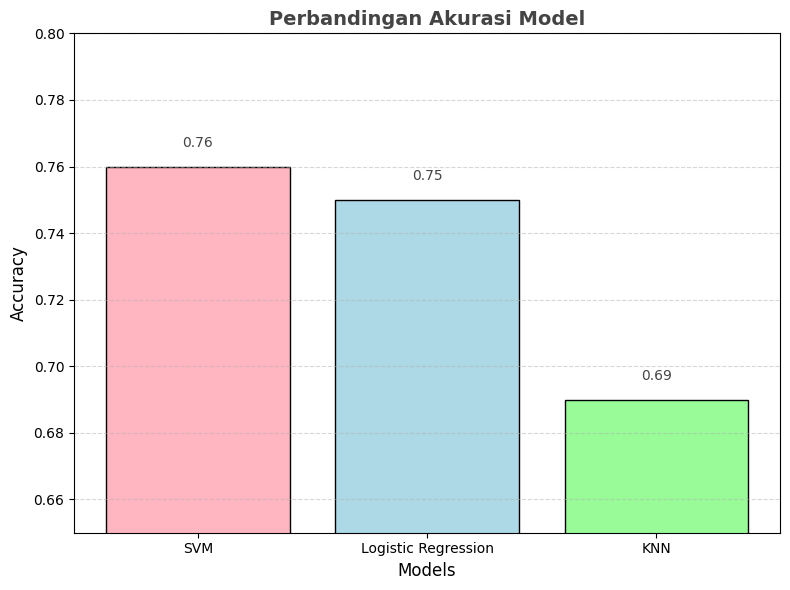

In [31]:
import matplotlib.pyplot as plt

models = ['SVM', 'Logistic Regression', 'KNN']
accuracies = [0.76, 0.75, 0.69]
colors = ['#FFB6C1', '#ADD8E6', '#98FB98']  # pink, biru, hijau pastel

plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=colors, edgecolor='black')

plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Perbandingan Akurasi Model', fontsize=14, fontweight='bold', color='#444')
plt.ylim(0.65, 0.8)  # 🧠 Ini dia yang diubah
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, acc + 0.005, f'{acc:.2f}',
             ha='center', va='bottom', fontsize=10, color='#444')

plt.show()


In [32]:
import numpy as np
import pandas as pd

# Data input pasien baru
input_data = (6, 190, 32, 48, 0, 21, 0.987, 60)

# Nama kolom harus sama kayak kolom di dataset asli kamu!
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Masukin data ke DataFrame
input_df = pd.DataFrame([input_data], columns=columns)

# Standardisasi
std_data = scaler.transform(input_df)
print("Data setelah distandardisasi:\n", std_data)

# Prediksi
prediction = best_model.predict(std_data)
print("Hasil prediksi:", prediction)

# Output hasil prediksi
if prediction[0] == 0:
    print('🟢 Pasien tidak terkena diabetes')
else:
    print('🔴 Pasien terkena diabetes')


Data setelah distandardisasi:
 [[ 0.63994726  2.1628039  -1.91826924  1.72273472 -0.69289057 -1.39516972
   1.5557347   2.27687294]]
Hasil prediksi: [1]
🔴 Pasien terkena diabetes


In [37]:
import pickle
filename = '23611045_model.sav'

# Simpan model
pickle.dump(best_model, open(filename, 'wb'))

print(f'Model berhasil disimpan ke file: {filename}')


Model berhasil disimpan ke file: 23611045_model.sav


Now, let's save the best performing model found from the Grid Search (in this case, the best KNN model since that was the last one tuned and assigned to `best_model`).

In [38]:
from google.colab import files

# Download file model
files.download('23611045_model.sav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>